In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [2]:
file_path = 'DryBeanDataSet.xlsx'
df = pd.read_excel(file_path)

df.shape

(13611, 22)

In [5]:
# Get the summary statistics for numeric columns
numeric_summary = df.describe().transpose()

# Display the summary statistics
numeric_summary

,count,mean,std,min,25%,50%,75%,max
Area,13611.0,53048.284549,29324.095717,20420.000000,36328.000000,44652.000000,61332.000000,2.546160e+05
Perimeter,13611.0,855.283459,214.289696,524.736000,703.523500,794.941000,977.213000,1.985370e+03
MajorAxisLength,13611.0,320.141867,85.694186,183.601165,253.303633,296.883367,376.495012,7.388602e+02
MinorAxisLength,13611.0,202.270714,44.970091,122.512653,175.848170,192.431733,217.031741,4.601985e+02
AspectRation,13611.0,1.583242,0.246678,1.024868,1.432307,1.551124,1.707109,2.430306e+00
Eccentricity,13611.0,0.750895,0.092002,0.218951,0.715928,0.764441,0.810466,9.114230e-01
ConvexArea,13611.0,53765.692602,29778.009358,-30.000000,36714.500000,45178.000000,62294.000000,2.632610e+05
Constantness,13611.0,0.902873,0.296142,0.000000,1.000000,1.000000,1.000000,1.000000e+00
EquivDiameter,13611.0,476.254106,25836.865632,0.161417,215.068003,238.438026,279.452162,3.014441e+06
Solidity,13611.0,0.987143,0.004660,0.919246,0.985670,0.988283,0.990013,9.946775e-01


In [6]:
# Get the summary statistics for categorical columns
categorical_summary = df.describe(include=['O']).transpose()

categorical_summary

,count,unique,top,freq
Colour,13611,5,brown,6115
Extent,13611,13530,?,6
Compactness,13611,13526,?,18
ShapeFactor6,13611,13607,?,5
Class,13611,8,DERMASON,3542


In [7]:
numeric_features = []
for feature in numeric_summary.index:
    mean = numeric_summary.loc[feature, 'mean']
    median = numeric_summary.loc[feature, '50%']
    std = numeric_summary.loc[feature, 'std']
    min_val = numeric_summary.loc[feature, 'min']
    max_val = numeric_summary.loc[feature, 'max']
    numeric_features.append((feature, mean, median, std, min_val, max_val))


In [8]:
categorical_features = []
for feature in categorical_summary.index:
    unique = categorical_summary.loc[feature, 'unique']
    top = categorical_summary.loc[feature, 'top']
    freq = categorical_summary.loc[feature, 'freq']
    categorical_features.append((feature, unique, top, freq))


In [9]:
def generate_numeric_latex_table(numeric_features):
    latex_table = """
\\begin{table*}[ht]
\\caption{Characterization of Numeric Dataset Features}
\\label{table:numeric_characterization}
\\centering
\\begin{tabular}{|c|c|c|c|c|c|}
\\hline
\\textbf{Feature Name} & \\textbf{Mean} & \\textbf{Median} & \\textbf{Std Dev} & \\textbf{Min} & \\textbf{Max} \\\\
\\hline
"""
    for feature in numeric_features:
        latex_table += f"{feature[0]} & {feature[1]:.2f} & {feature[2]:.2f} & {feature[3]:.2f} & {feature[4]:.2f} & {feature[5]:.2f} \\\\\n"
        latex_table += "\\hline\n"
    latex_table += "\\end{tabular}\n\\end{table*}"
    return latex_table

print(generate_numeric_latex_table(numeric_features))



\begin{table*}[ht]
\caption{Characterization of Numeric Dataset Features}
\label{table:numeric_characterization}
\centering
\begin{tabular}{|c|c|c|c|c|c|}
\hline
\textbf{Feature Name} & \textbf{Mean} & \textbf{Median} & \textbf{Std Dev} & \textbf{Min} & \textbf{Max} \\
\hline
Area & 53048.28 & 44652.00 & 29324.10 & 20420.00 & 254616.00 \\
\hline
Perimeter & 855.28 & 794.94 & 214.29 & 524.74 & 1985.37 \\
\hline
MajorAxisLength & 320.14 & 296.88 & 85.69 & 183.60 & 738.86 \\
\hline
MinorAxisLength & 202.27 & 192.43 & 44.97 & 122.51 & 460.20 \\
\hline
AspectRation & 1.58 & 1.55 & 0.25 & 1.02 & 2.43 \\
\hline
Eccentricity & 0.75 & 0.76 & 0.09 & 0.22 & 0.91 \\
\hline
ConvexArea & 53765.69 & 45178.00 & 29778.01 & -30.00 & 263261.00 \\
\hline
Constantness & 0.90 & 1.00 & 0.30 & 0.00 & 1.00 \\
\hline
EquivDiameter & 476.25 & 238.44 & 25836.87 & 0.16 & 3014441.24 \\
\hline
Solidity & 0.99 & 0.99 & 0.00 & 0.92 & 0.99 \\
\hline
roundness & 0.87 & 0.88 & 0.06 & 0.49 & 0.99 \\
\hline
ShapeFactor1 &

In [10]:
def generate_categorical_latex_table(categorical_features):
    latex_table = """
\\begin{table*}[ht]
\\caption{Characterization of Categorical Dataset Features}
\\label{table:categorical_characterization}
\\centering
\\begin{tabular}{|c|c|c|c|}
\\hline
\\textbf{Feature Name} & \\textbf{Unique Values} & \\textbf{Most Common} & \\textbf{Frequency} \\\\
\\hline
"""
    for feature in categorical_features:
        latex_table += f"{feature[0]} & {feature[1]} & {feature[2]} & {feature[3]} \\\\\n"
        latex_table += "\\hline\n"
    latex_table += "\\end{tabular}\n\\end{table*}"
    return latex_table

print(generate_categorical_latex_table(categorical_features))



\begin{table*}[ht]
\caption{Characterization of Categorical Dataset Features}
\label{table:categorical_characterization}
\centering
\begin{tabular}{|c|c|c|c|}
\hline
\textbf{Feature Name} & \textbf{Unique Values} & \textbf{Most Common} & \textbf{Frequency} \\
\hline
Colour & 5 & brown & 6115 \\
\hline
Extent & 13530 & ? & 6 \\
\hline
Compactness & 13526 & ? & 18 \\
\hline
ShapeFactor6 & 13607 & ? & 5 \\
\hline
Class & 8 & DERMASON & 3542 \\
\hline
\end{tabular}
\end{table*}


In [11]:
# Check for duplicate rows
duplicates = df[df.duplicated()]

# Display duplicate rows if any
if not duplicates.empty:
    print("Duplicate rows found:")
    print(duplicates)
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [12]:
# Replace '?' with NaN
df.replace('?', pd.NA, inplace=True)

# Check for missing values per feature
missing_values = df.isnull().sum()

# Display missing values per feature
print("Missing values per feature:")
print(missing_values)

Missing values per feature:
Area                0
Perimeter           0
MajorAxisLength     0
MinorAxisLength     0
AspectRation        0
Eccentricity        0
ConvexArea          0
Constantness        0
EquivDiameter       0
Colour              6
Extent              6
Solidity            0
roundness           0
Compactness        18
ShapeFactor1        0
ShapeFactor2        0
ShapeFactor3        0
ShapeFactor4        0
ShapeFactor5        0
ShapeFactor6        5
Class              17
Sort order          0
dtype: int64


In [14]:
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,Constantness,EquivDiameter,Colour,...,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,ShapeFactor5,ShapeFactor6,Class,Sort order
0,84648,1132.054,439.915710,248.961941,1.767000,0.824453,86779,1,328.294351,brown,...,0.830027,0.746266,0.005197,0.000994,0.556914,3.487008,0.984066,50.809833,CALI,0.134791
1,39704,736.873,271.659919,186.481404,1.456767,0.727175,40106,1,224.839282,black,...,0.918880,0.82765,0.006842,0.001980,0.685004,1.242335,0.997891,148.508874,DERMASON,0.898848
2,35835,687.914,237.704180,192.176759,1.236904,0.588537,36190,1,213.603696,green,...,0.951588,0.898611,0.006633,0.002668,0.807503,2.813489,0.998803,82.107117,SEKER,0.539684
3,223035,1817.278,680.812555,419.994347,1.621004,0.787040,225889,1,532.894907,brown,...,0.848673,0.782734,0.003052,0.000707,0.612672,3.074472,0.993144,147.347735,BOMBAY,0.149130
4,41957,767.143,287.962974,186.166695,1.546802,0.762918,42310,1,231.130508,brown,...,0.895904,0.80264,0.006863,0.001757,0.644230,2.213954,0.996497,22.893826,SIRA,0.447635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,23018,578.382,203.761000,144.297607,1.412089,0.706041,23465,1,171.194123,black,...,0.864665,0.840171,0.008852,0.002721,0.705888,2.197446,0.996776,85.821969,DERMASON,0.764478
13607,69773,1095.057,387.116310,231.153291,1.674717,0.802155,71055,1,298.056610,brown,...,0.731179,0.769941,0.005548,0.001203,0.592809,1.004792,0.992787,152.980591,BARBUNYA,0.679735
13608,55773,968.988,347.920243,204.491191,1.701395,0.809040,57047,0,266.481499,brown,...,0.746444,0.765927,0.006238,0.001324,0.586644,2.219590,0.998113,102.437378,BARBUNYA,0.946849
13609,64235,1005.875,409.304636,201.686606,2.029409,0.870169,65018,1,285.983465,white,...,0.797799,0.698706,0.006372,0.000937,0.488190,2.078504,0.990736,174.754039,HOROZ,0.046135


In [16]:
# Find rows with missing values in any column
rows_with_missing_values = df[df.isnull().any(axis=1)]

# Display all columns in the output
pd.set_option('display.max_columns', None)

# Display rows with missing values
print("Rows with missing values:")
print(rows_with_missing_values)

Rows with missing values:
         Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
6       44787    861.814       344.333903       166.179732      2.072057   
104     48479    836.757       312.354576       199.059288      1.569153   
118     42432    776.089       290.071712       187.172173      1.549759   
436     41708    775.920       292.968805       181.913240      1.610486   
484     76489   1079.856       423.766238       234.103967      1.810163   
788     56433    948.827       381.693063       191.664022      1.991470   
902     33128    672.417       249.492034       169.302978      1.473642   
935     79500   1114.478       384.103818       264.490171      1.452242   
1164    94651   1199.819       424.741867       284.927628      1.490701   
1175    34757    686.779       231.229870       191.672033      1.206383   
1244    43407    766.597       267.183501       207.399654      1.288254   
1354    24754    590.086       223.247005       141.526322    

In [17]:
# Convert all columns to numeric, forcing errors to NaN
df = df.apply(pd.to_numeric, errors='coerce')

In [18]:
# Z-score method
def find_outliers_zscore(data, threshold=3):
    mean = np.mean(data)
    std = np.std(data)
    z_scores = (data - mean) / std
    return np.abs(z_scores) > threshold

# IQR method
def find_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

In [24]:
# Find and display outliers with counters
outliers_zscore = {}
outliers_iqr = {}
outliers_zscore_count = {}
outliers_iqr_count = {}

for column in df.columns:
    if df[column].dtype in [np.float64, np.int64]:
        outliers_zscore[column] = df[find_outliers_zscore(df[column])]
        outliers_iqr[column] = df[find_outliers_iqr(df[column])]
        outliers_zscore_count[column] = outliers_zscore[column].shape[0]
        outliers_iqr_count[column] = outliers_iqr[column].shape[0]

In [25]:
print("Outliers detected using Z-score method:")
for column, outliers in outliers_zscore.items():
    if not outliers.empty:
        print(f"\n{column} (Count: {outliers_zscore_count[column]}):")
        print(outliers)     

Outliers detected using Z-score method:

Area (Count: 483):
         Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
3      223035   1817.278       680.812555       419.994347      1.621004   
63     184246   1642.028       646.577540       365.205365      1.770449   
127    182972   1640.716       587.467531       398.927732      1.472616   
134    158935   1504.266       546.700546       372.920603      1.465997   
163    171799   1542.958       560.173375       392.091017      1.428682   
...       ...        ...              ...              ...           ...   
13447  190728   1696.174       665.988505       368.942017      1.805131   
13533  173108   1591.411       572.661655       388.984863      1.472195   
13557  174090   1619.733       620.800582       362.785001      1.711208   
13577  175276   1595.654       608.730967       368.763860      1.650734   
13599  141519   1442.904       523.100668       347.095793      1.507079   

       Eccentricity  Convex

        Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
7      32941    695.209       255.121867       164.681723      1.549181   
51     38067    707.292       247.875211       195.710196      1.266542   
61     69392   1065.193       383.856710       230.488158      1.665408   
66     35664    711.193       275.695144       165.200645      1.668850   
73     52233    863.826       330.234958       202.334320      1.632125   
...      ...        ...              ...              ...           ...   
13561  46243    800.216       299.536352       197.308325      1.518113   
13563  41097    763.983       278.388428       188.869716      1.473971   
13582  71601   1107.086       399.311734       229.197436      1.742217   
13608  55773    968.988       347.920243       204.491191      1.701395   
13610  39120    734.947       278.316950       179.575513      1.549860   

       Eccentricity  ConvexArea  Constantness  EquivDiameter  Colour  \
7          0.763758       3

12814    0.928962  

ShapeFactor3 (Count: 8):
        Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
452    42515    763.560       237.020916       228.691363      1.036423   
3228   36496    698.972       218.336955       213.039183      1.024868   
3968   32947    668.231       209.693293       200.249599      1.047160   
6834   41346    741.288       236.422635       222.875023      1.060786   
9095   41068    727.628       233.470789       224.068064      1.041964   
10807  30140    620.134       201.847882       190.279279      1.060798   
12356  41898    732.244       236.673002       225.578999      1.049180   
12814  33236    660.788       210.858002       200.927367      1.049424   

       Eccentricity  ConvexArea  Constantness  EquivDiameter  Colour  \
452        0.262774       43038             1     232.662372     NaN   
3228       0.218951       36927             1     215.564724     NaN   
3968       0.296721       33336             1     204.815584  

In [26]:
print("\nOutliers detected using IQR method:")
for column, outliers in outliers_iqr.items():
    if not outliers.empty:
        print(f"\n{column} (Count: {outliers_iqr_count[column]}):")
        print(outliers)


Outliers detected using IQR method:

Area (Count: 551):
         Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
3      223035   1817.278       680.812555       419.994347      1.621004   
63     184246   1642.028       646.577540       365.205365      1.770449   
93     100635   1229.591       472.423793       276.096302      1.711083   
127    182972   1640.716       587.467531       398.927732      1.472616   
134    158935   1504.266       546.700546       372.920603      1.465997   
...       ...        ...              ...              ...           ...   
13447  190728   1696.174       665.988505       368.942017      1.805131   
13533  173108   1591.411       572.661655       388.984863      1.472195   
13557  174090   1619.733       620.800582       362.785001      1.711208   
13577  175276   1595.654       608.730967       368.763860      1.650734   
13599  141519   1442.904       523.100668       347.095793      1.507079   

       Eccentricity  ConvexAre

         Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
3      223035   1817.278       680.812555       419.994347      1.621004   
63     184246   1642.028       646.577540       365.205365      1.770449   
93     100635   1229.591       472.423793       276.096302      1.711083   
127    182972   1640.716       587.467531       398.927732      1.472616   
134    158935   1504.266       546.700546       372.920603      1.465997   
...       ...        ...              ...              ...           ...   
13447  190728   1696.174       665.988505       368.942017      1.805131   
13533  173108   1591.411       572.661655       388.984863      1.472195   
13557  174090   1619.733       620.800582       362.785001      1.711208   
13577  175276   1595.654       608.730967       368.763860      1.650734   
13599  141519   1442.904       523.100668       347.095793      1.507079   

       Eccentricity  ConvexArea  Constantness  EquivDiameter  Colour  \
3          0.78

In [27]:
# Check for class imbalances in categorical features
categorical_features = df.select_dtypes(include=['object', 'category']).columns
print("Class Imbalance in Categorical Features:")
for column in categorical_features:
    print(f"\n{column}:")
    print(df[column].value_counts())

Class Imbalance in Categorical Features:


In [28]:
# Check for skewness in numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns
print("\nSkewness in Numerical Features:")
skewness = df[numerical_features].skew()
print(skewness)


Skewness in Numerical Features:
Area                 2.952931
Perimeter            1.626124
MajorAxisLength      1.357815
MinorAxisLength      2.238211
AspectRation         0.582573
Eccentricity        -1.062824
ConvexArea           2.940745
Constantness        -2.721208
EquivDiameter      116.654374
Colour                    NaN
Extent              -0.896130
Solidity            -2.550093
roundness           -0.635749
Compactness          0.037120
ShapeFactor1        -0.534141
ShapeFactor2         0.301226
ShapeFactor3         0.242481
ShapeFactor4         0.007631
ShapeFactor5        -2.759483
ShapeFactor6         0.006815
Class                     NaN
Sort order          -0.011103
dtype: float64


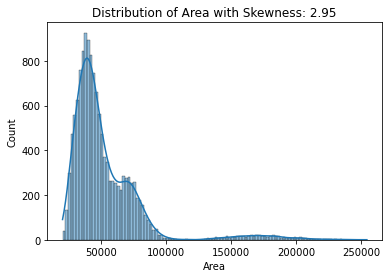

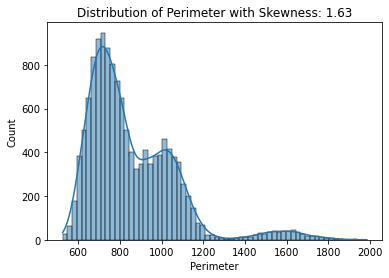

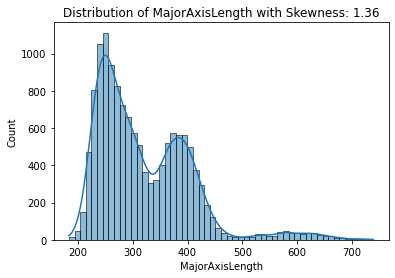

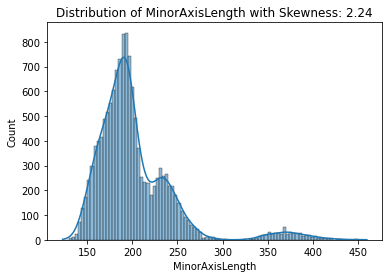

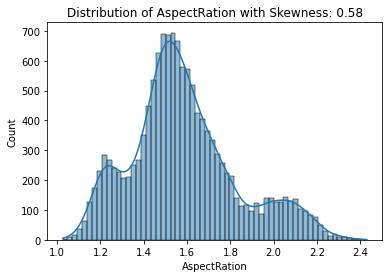

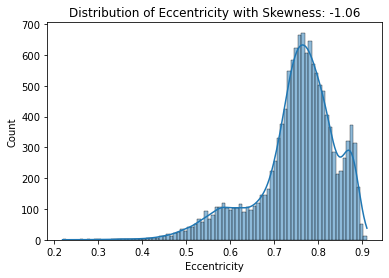

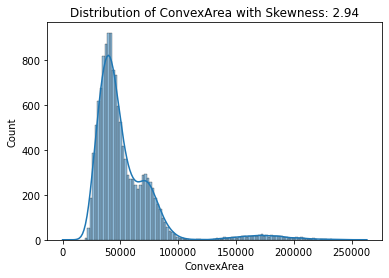

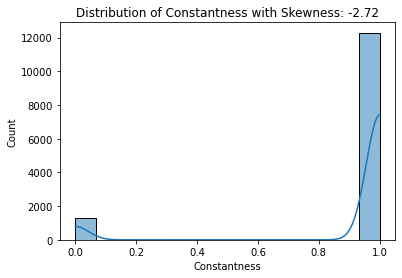


KeyboardInterrupt



In [31]:
# Plot distributions for numerical features
for column in numerical_features:
    sns.histplot(df[column].dropna(), kde=True)
    plt.title(f'Distribution of {column} with Skewness: {skewness[column]:.2f}')
    plt.show()

In [32]:
df.skew().sort_values(ascending=False)

EquivDiameter      116.654374
Area                 2.952931
ConvexArea           2.940745
MinorAxisLength      2.238211
Perimeter            1.626124
MajorAxisLength      1.357815
AspectRation         0.582573
ShapeFactor2         0.301226
ShapeFactor3         0.242481
Compactness          0.037120
ShapeFactor4         0.007631
ShapeFactor6         0.006815
Sort order          -0.011103
ShapeFactor1        -0.534141
roundness           -0.635749
Extent              -0.896130
Eccentricity        -1.062824
Solidity            -2.550093
Constantness        -2.721208
ShapeFactor5        -2.759483
Colour                    NaN
Class                     NaN
dtype: float64

In [35]:
# Select numerical features
numerical_features = df.select_dtypes(include=[np.number])

# Calculate skewness for each numerical feature
skewness = numerical_features.apply(lambda x: skew(x.dropna(), bias=False))

# Sort features by skewness in descending order
skewness_sorted = skewness.sort_values(ascending=False)

# Define a threshold for skewness to consider it as skewed
skew_threshold = 0.5  # You can adjust this threshold based on your needs

# Create a summary of skewness
skewness_summary = pd.DataFrame({
    'Skewness': skewness_sorted,
    'Is Skewed': skewness_sorted.abs() > skew_threshold,
    'Action Needed': ['Consider transformation' if abs(skew) > skew_threshold else 'No action needed' for skew in skewness_sorted]
})

# Print the summary
print(skewness_summary)

                   Skewness  Is Skewed            Action Needed
EquivDiameter    116.654374       True  Consider transformation
Area               2.952931       True  Consider transformation
ConvexArea         2.940745       True  Consider transformation
MinorAxisLength    2.238211       True  Consider transformation
Perimeter          1.626124       True  Consider transformation
MajorAxisLength    1.357815       True  Consider transformation
AspectRation       0.582573       True  Consider transformation
ShapeFactor2       0.301226      False         No action needed
ShapeFactor3       0.242481      False         No action needed
Compactness        0.037120      False         No action needed
ShapeFactor4       0.007631      False         No action needed
ShapeFactor6       0.006815      False         No action needed
Sort order        -0.011103      False         No action needed
ShapeFactor1      -0.534141       True  Consider transformation
roundness         -0.635749       True  

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1107: RuntimeWarning: Mean of empty slice.
  mean = a.mean(axis, keepdims=True)
C:\Anaconda\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Anaconda\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [37]:
# Identify categorical and numerical features
df2 = pd.read_excel(file_path)
categorical_features = df2.select_dtypes(include=['object', 'category']).columns
numerical_features = df2.select_dtypes(include=['number']).columns

# Print the results
print("Categorical Features:")
print(categorical_features)

print("\nNumerical Features:")
print(numerical_features)

Categorical Features:
Index(['Colour', 'Extent', 'Compactness', 'ShapeFactor6', 'Class'], dtype='object')

Numerical Features:
Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'Constantness',
       'EquivDiameter', 'Solidity', 'roundness', 'ShapeFactor1',
       'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4', 'ShapeFactor5',
       'Sort order'],
      dtype='object')


In [42]:
# Display the head of all categorical features
print("Head of Categorical Features:")
for feature in categorical_features:
    print(f"\nFeature: {feature}")
    print(df2[feature].head())

Head of Categorical Features:

Feature: Colour
0    brown
1    black
2    green
3    brown
4    brown
Name: Colour, dtype: object

Feature: Extent
0    0.767184
1    0.757739
2    0.790885
3    0.761092
4    0.721543
Name: Extent, dtype: object

Feature: Compactness
0    0.746266
1     0.82765
2    0.898611
3    0.782734
4     0.80264
Name: Compactness, dtype: object

Feature: ShapeFactor6
0     50.809833
1    148.508874
2     82.107117
3    147.347735
4     22.893826
Name: ShapeFactor6, dtype: object

Feature: Class
0        CALI
1    DERMASON
2       SEKER
3      BOMBAY
4        SIRA
Name: Class, dtype: object


In [44]:
# Display unique values for each categorical feature
print("Unique Values for Categorical Features:")
for feature in categorical_features:
    unique_values = df2[feature].unique()
    print(f"\nFeature: {feature}")
    print(f"Unique Values ({len(unique_values)}):")
    print(unique_values)

Unique Values for Categorical Features:

Feature: Colour
Unique Values (5):
['brown' 'black' 'green' 'white' '?']

Feature: Extent
Unique Values (13530):
[0.767183874709977 0.757738844994084 0.790885014345619 ...
 0.765376698229724 0.773990264121843 0.770321361058601]

Feature: Compactness
Unique Values (13526):
[0.746266486219902 0.827649817553249 0.89861144543244 ...
 0.765926974222145 0.698705657912805 0.801890052530987]

Feature: ShapeFactor6
Unique Values (13607):
[50.8098331406309 148.50887396228 82.1071172390352 ... 102.437378325187
 174.754039219401 38.3062497803811]

Feature: Class
Unique Values (8):
['CALI' 'DERMASON' 'SEKER' 'BOMBAY' 'SIRA' '?' 'HOROZ' 'BARBUNYA']


In [7]:
# Count the number of occurrences of each class
class_counts = df['Class'].value_counts()

# Display the counts
print(class_counts)

DERMASON    3542
SIRA        2634
SEKER       2025
HOROZ       1927
CALI        1628
BARBUNYA    1317
BOMBAY       521
?             17
Name: Class, dtype: int64


In [4]:
file_path = 'DryBeanDataSet.xlsx'
df = pd.read_excel(file_path)
# Replace '?' with NaN
df.replace('?', pd.NA, inplace=True)

df.shape

(13611, 22)

In [6]:
# List of categorical features
categorical_features_list = ['Colour', 'Class']

# Filter out only the categorical features from the dataframe
categorical_features = df[categorical_features_list]

# Categorical Features Summary
categorical_summary = categorical_features.describe().T
categorical_summary['% Miss.'] = categorical_features.isnull().mean() * 100
categorical_summary['Mode Freq.'] = categorical_features.apply(lambda x: x.value_counts().iloc[0])
categorical_summary['Mode %'] = categorical_summary['Mode Freq.'] / categorical_summary['count'] * 100
categorical_summary['2nd Mode'] = categorical_features.apply(lambda x: x.value_counts().index[1] if len(x.value_counts()) > 1 else None)
categorical_summary['2nd Mode Freq.'] = categorical_features.apply(lambda x: x.value_counts().iloc[1] if len(x.value_counts()) > 1 else None)
categorical_summary['2nd Mode %'] = categorical_summary['2nd Mode Freq.'] / categorical_summary['count'] * 100

categorical_summary = categorical_summary[['count', '% Miss.', 'unique', 'top', 'Mode Freq.', 'Mode %', '2nd Mode', '2nd Mode Freq.', '2nd Mode %']]
categorical_summary.columns = ['Count', '% Miss.', 'Card.', 'Mode', 'Mode Freq.', 'Mode %', '2nd Mode', '2nd Mode Freq.', '2nd Mode %']


In [7]:
# Filter out categorical features based on data type (strings and exclude missing values)
categorical_features = df.select_dtypes(include=['object']).copy()
categorical_features = categorical_features.dropna(axis=1, how='all')  # Drop columns where all values are NaN

# Categorical Features Summary
categorical_summary = categorical_features.describe().T
categorical_summary['% Miss.'] = categorical_features.isnull().mean() * 100
categorical_summary['Mode Freq.'] = categorical_features.apply(lambda x: x.value_counts().iloc[0])
categorical_summary['Mode %'] = categorical_summary['Mode Freq.'] / categorical_summary['count'] * 100
categorical_summary['2nd Mode'] = categorical_features.apply(lambda x: x.value_counts().index[1] if len(x.value_counts()) > 1 else None)
categorical_summary['2nd Mode Freq.'] = categorical_features.apply(lambda x: x.value_counts().iloc[1] if len(x.value_counts()) > 1 else None)
categorical_summary['2nd Mode %'] = categorical_summary['2nd Mode Freq.'] / categorical_summary['count'] * 100

categorical_summary = categorical_summary[['count', '% Miss.', 'unique', 'top', 'Mode Freq.', 'Mode %', '2nd Mode', '2nd Mode Freq.', '2nd Mode %']]
categorical_summary.columns = ['Count', '% Miss.', 'Card.', 'Mode', 'Mode Freq.', 'Mode %', '2nd Mode', '2nd Mode Freq.', '2nd Mode %']


In [8]:
import pandas as pd

# Assuming df is your DataFrame

# Continuous Features Summary
continuous_summary = df.describe().T
continuous_summary['% Miss.'] = df.isnull().mean() * 100
continuous_summary['Card.'] = df.nunique()
continuous_summary['1st Qrt.'] = df.quantile(0.25)
continuous_summary['3rd Qrt.'] = df.quantile(0.75)

continuous_summary = continuous_summary[['count', '% Miss.', 'Card.', 'min', '1st Qrt.', 'mean', '50%', '3rd Qrt.', 'max', 'std']]
continuous_summary.columns = ['Count', '% Miss.', 'Card.', 'Min.', '1st Qrt.', 'Mean', 'Median', '3rd Qrt.', 'Max.', 'Std. Dev.']

# Display Continuous Features Summary
print("Continuous Features Summary")
print(continuous_summary)

print("\n" + "-"*50 + "\n")

# List of categorical features
categorical_features_list = ['Colour', 'Class']

# Filter out only the categorical features from the dataframe
categorical_features = df[categorical_features_list]

# Categorical Features Summary
categorical_summary = categorical_features.describe().T
categorical_summary['% Miss.'] = categorical_features.isnull().mean() * 100
categorical_summary['Mode Freq.'] = categorical_features.apply(lambda x: x.value_counts().iloc[0])
categorical_summary['Mode %'] = categorical_summary['Mode Freq.'] / categorical_summary['count'] * 100
categorical_summary['2nd Mode'] = categorical_features.apply(lambda x: x.value_counts().index[1] if len(x.value_counts()) > 1 else None)
categorical_summary['2nd Mode Freq.'] = categorical_features.apply(lambda x: x.value_counts().iloc[1] if len(x.value_counts()) > 1 else None)
categorical_summary['2nd Mode %'] = categorical_summary['2nd Mode Freq.'] / categorical_summary['count'] * 100

categorical_summary = categorical_summary[['count', '% Miss.', 'unique', 'top', 'Mode Freq.', 'Mode %', '2nd Mode', '2nd Mode Freq.', '2nd Mode %']]
categorical_summary.columns = ['Count', '% Miss.', 'Card.', 'Mode', 'Mode Freq.', 'Mode %', '2nd Mode', '2nd Mode Freq.', '2nd Mode %']

# Display Categorical Features Summary
print("Categorical Features Summary")
print(categorical_summary)


Continuous Features Summary
                   Count  % Miss.  Card.          Min.      1st Qrt.  \
Area             13611.0      0.0  12011  20420.000000  36328.000000   
Perimeter        13611.0      0.0  13351    524.736000    703.523500   
MajorAxisLength  13611.0      0.0  13543    183.601165    253.303633   
MinorAxisLength  13611.0      0.0  13543    122.512653    175.848170   
AspectRation     13611.0      0.0  13543      1.024868      1.432307   
Eccentricity     13611.0      0.0  13543      0.218951      0.715928   
ConvexArea       13611.0      0.0  12066    -30.000000  36714.500000   
Constantness     13611.0      0.0      2      0.000000      1.000000   
EquivDiameter    13611.0      0.0  12012      0.161417    215.068003   
Solidity         13611.0      0.0  13526      0.919246      0.985670   
roundness        13611.0      0.0  13543      0.489618      0.832096   
ShapeFactor1     13611.0      0.0  13543      0.002778      0.005900   
ShapeFactor2     13611.0      0.0  1